In [24]:
import salem
import xarray as xr
from utils import constants as cnst
from utils import u_plot as uplot, u_darrays as uda, u_met
import numpy as np
import matplotlib.pyplot as plt

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
era = '/home/ck/DIR/mymachine/ERA5/monthly/*.nc'

In [47]:
ds = xr.open_mfdataset(era, combine='by_coords')
ds = uda.flip_lat(ds)

In [48]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 87, longitude: 143, time: 420)
Coordinates:
  * latitude   (latitude) float32 3.5 3.75 4.0 4.25 ... 24.25 24.5 24.75 25.0
  * longitude  (longitude) float32 -18.5 -18.25 -18.0 -17.75 ... 16.5 16.75 17.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2013-12-01
Data variables:
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(12, 87, 143), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2020-01-10 18:53:12 GMT by grib_to_netcdf-2.15.0: /opt/ecmw...

In [50]:
monthlyclim = ds.groupby('time.month').mean('time')

In [51]:
monthlyclim['tp'] = monthlyclim['tp']*1000

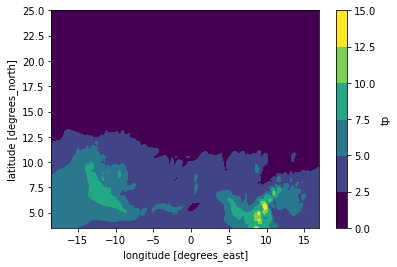

In [52]:
monthlyclim['tp'].mean('month').plot.contourf()

In [53]:
lp = monthlyclim.mean(['latitude', 'longitude'])

In [54]:
lp

<xarray.Dataset>
Dimensions:  (month: 12)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    tp       (month) float32 dask.array<chunksize=(1,), meta=np.ndarray>

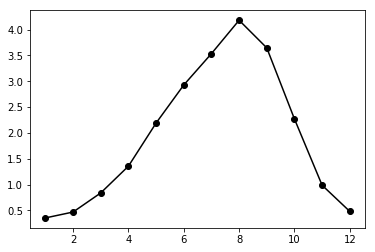

In [57]:
plt.plot(lp.month.values, lp['tp'], '-ko')